### Figure 1 & ED Figure 7

In [1]:
%run IMP.ipynb

#### Input Data

In [2]:
ny = 2100-1991
YS = np.arange(2001,2041+1,20)
YE = np.arange(2010,2050+1,20)
ntime = np.size(YS)

In [3]:
ds = xr.open_dataset('SALT_BL_CTRL.nc')
lat,lon = ds.lat.values,ds.lon.values
nlat,nlon = np.size(lat),np.size(lon)

salt_bl_cntl  = xr.DataArray(np.zeros((ntime,nlat,nlon)),coords=[('time',np.arange(1,ntime+1,1)),('lat',lat),('lon',lon)])
temp_bl_cntl  = xr.DataArray(np.zeros((ntime,nlat,nlon)),coords=[('time',np.arange(1,ntime+1,1)),('lat',lat),('lon',lon)])
age_bl_cntl   = xr.DataArray(np.zeros((ntime,nlat,nlon)),coords=[('time',np.arange(1,ntime+1,1)),('lat',lat),('lon',lon)])

salt_bl_wthmp = xr.DataArray(np.zeros((ntime,nlat,nlon)),coords=[('time',np.arange(1,ntime+1,1)),('lat',lat),('lon',lon)])
temp_bl_wthmp = xr.DataArray(np.zeros((ntime,nlat,nlon)),coords=[('time',np.arange(1,ntime+1,1)),('lat',lat),('lon',lon)])
age_bl_wthmp  = xr.DataArray(np.zeros((ntime,nlat,nlon)),coords=[('time',np.arange(1,ntime+1,1)),('lat',lat),('lon',lon)])

salt_bl_wthp = xr.DataArray(np.zeros((ntime,nlat,nlon)),coords=[('time',np.arange(1,ntime+1,1)),('lat',lat),('lon',lon)])
temp_bl_wthp = xr.DataArray(np.zeros((ntime,nlat,nlon)),coords=[('time',np.arange(1,ntime+1,1)),('lat',lat),('lon',lon)])
age_bl_wthp  = xr.DataArray(np.zeros((ntime,nlat,nlon)),coords=[('time',np.arange(1,ntime+1,1)),('lat',lat),('lon',lon)])

for ii in range(ntime):
    salt_bl_cntl[ii,:,:]  = xr.open_dataset('SALT_BL_CTRL.nc').SALT_BL.sel(year=slice(YS[ii]+ny,YE[ii]+ny)).mean('year')
    temp_bl_cntl[ii,:,:]  = xr.open_dataset('TEMP_BL_CTRL.nc').TEMP_BL.sel(year=slice(YS[ii]+ny,YE[ii]+ny)).mean('year')
    age_bl_cntl[ii,:,:]   = xr.open_dataset('AGE_GLOBAL_BL_CTRL.nc').AGE_GLOBAL_BL.sel(year=slice(YS[ii]+ny,YE[ii]+ny)).mean('year')
    
    salt_bl_wthmp[ii,:,:] = xr.open_dataset('SALT_BL_WTM.nc').SALT_BL.sel(year=slice(YS[ii]+ny,YE[ii]+ny)).mean('year')
    temp_bl_wthmp[ii,:,:] = xr.open_dataset('TEMP_BL_WTM.nc').TEMP_BL.sel(year=slice(YS[ii]+ny,YE[ii]+ny)).mean('year')
    age_bl_wthmp[ii,:,:]  = xr.open_dataset('AGE_GLOBAL_BL_WTM.nc').AGE_GLOBAL_BL.sel(year=slice(YS[ii]+ny,YE[ii]+ny)).mean('year')
    
    salt_bl_wthp[ii,:,:] = xr.open_dataset('SALT_BL_WT.nc').SALT_BL.sel(year=slice(YS[ii]+ny,YE[ii]+ny)).mean('year')
    temp_bl_wthp[ii,:,:] = xr.open_dataset('TEMP_BL_WT.nc').TEMP_BL.sel(year=slice(YS[ii]+ny,YE[ii]+ny)).mean('year')
    age_bl_wthp[ii,:,:]  = xr.open_dataset('AGE_GLOBAL_BL_WT.nc').AGE_GLOBAL_BL.sel(year=slice(YS[ii]+ny,YE[ii]+ny)).mean('year')
    
salt_bl_anom_wthmp = salt_bl_wthmp - salt_bl_cntl
temp_bl_anom_wthmp = temp_bl_wthmp - temp_bl_cntl

salt_bl_anom_wthp = salt_bl_wthp - salt_bl_cntl
temp_bl_anom_wthp = temp_bl_wthp - temp_bl_cntl

salt_bl_anom_mp = salt_bl_wthmp - salt_bl_wthp
temp_bl_anom_mp = temp_bl_wthmp - temp_bl_wthp

age_bl_anom_wthmp_off = calc_bl_anom_off(age_bl_wthmp,age_bl_cntl)
age_bl_anom_wthp_off  = calc_bl_anom_off(age_bl_wthp,age_bl_cntl)
age_bl_anom_mp_off    = calc_bl_anom_off(age_bl_wthmp,age_bl_wthp)

#### Plot

In [4]:
def make_plot9_SouthPolarStereo(lon1,lat1,var1,var2,var3,var4,\
                                levs1,levs2,levs3,levs4,\
                                unit1,unit2,unit3,unit4,\
                                colormap1,colormap2,colormap3,colormap4,PI):
    ''''''
    nlat = len(var3.lat)
    latN = -55
    geolat = geolat_t_01[0:nlat,:]
    geolon = geolon_t_01[0:nlat,:]
    geolon[:,0],geolon[:,np.size(geolon[0,:])-1] = -280,80
    
    hi,hj = 6,6
    ncol,nrow = 3,3
    
    titles = [str(YS[ii])+'$-$'+str(YE[ii]) for ii in range(ntime)]    
    subtitles = ['a)','b)','c)','d)','e)','f)','g)','h)','i)']
    ''''''
    fig = plt.figure(1,figsize=(hi*ncol,(hj+1)*nrow-1.8))
    gs = gridspec.GridSpec(ncols=ncol,nrows=nrow,wspace=0.06,hspace=0.05,width_ratios=[1,1,1],height_ratios=[1,1,1])
    st = fig.suptitle('',fontsize=16)
    
    for ii in range(ncol*nrow):
        ax = plt.subplot(gs[ii],projection=ccrs.SouthPolarStereo(central_longitude=0.0,globe=None))
        add_circle(ax)
        if ncol*0<=ii<ncol*1:
            p1 = ax.contourf(lon1[::PI],lat1[::PI],var1[ii,::PI,::PI],levels=levs1,cmap=colormap1,extend='max',zorder=5,transform=ccrs.PlateCarree())
            p2 = ax.contourf(geolon[::PI,::PI],geolat[::PI,::PI],var2[ii,::PI,::PI],levels=levs2,cmap=colormap2,extend='both',zorder=0,transform=ccrs.PlateCarree())
            ax.set_title(titles[ii],fontsize=16.5+3.5,loc='center',y=1.05)
        elif ncol*1<=ii<ncol*2:
            p3 = ax.contourf(geolon[::PI,::PI],geolat[::PI,::PI],var3[ii-ncol*1,::PI,::PI],levels=levs3,cmap=colormap3,extend='both',zorder=5,transform=ccrs.PlateCarree())
        elif ncol*2<=ii<ncol*3:
            p4 = ax.contourf(geolon[::PI,::PI],geolat[::PI,::PI],var4[ii-ncol*2,::PI,::PI],levels=levs4,cmap=colormap4,extend='both',zorder=5,transform=ccrs.PlateCarree())
        ax.contour(contour_4000m.xt_ocean,contour_4000m.yt_ocean,contour_4000m,[0,1],colors='k',linewidths=0.5,alpha=0.3,zorder=10,transform=ccrs.PlateCarree())
        antarctic_map(ax,True,False,geolon_t_01,geolat_t_01,land_mask_01)
        ax.set_extent([-180,180,-90,latN],crs=ccrs.PlateCarree())
        
        add_grid_labels_SouthPolarStereo(ax,60,10,360,0,315,-180,latN,0.33,11,[1.145,0.7,0.97,1.015,0.945,1.02],0.71)
        gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=False,linewidth=1,color='gray',alpha=0.5,linestyle='--',zorder=10)
        gl.xlocator = mticker.FixedLocator(np.arange(-180,180+1,60))
        gl.ylocator = mticker.FixedLocator(np.arange(-90,0+1,10))
        
        ax.set_title(subtitles[ii],fontsize=15,loc='left',x=0.05,y=0.9)
        locs = [0.5,0.5,0.5,0.5,0.5,0.5,0.55,0.55,0.55]
        TITLES = ['SWMT+AGE','SWMT+AGE','SWMT+AGE','SALINITY','SALINITY','SALINITY','TEMPERATURE','TEMPERATURE','TEMPERATURE']
        plt.text(locs[ii],0.5,TITLES[ii],fontsize=20,color='black',zorder=15,horizontalalignment='center',verticalalignment='center',transform=ax.transAxes)
        
        fcolor = 'dimgrey'
        plt.text(-70,-76.5,'Weddell',fontsize=13,color=fcolor,transform=ccrs.PlateCarree(),zorder=15)
        plt.text( 70,-78.0,'Prydz'  ,fontsize=13,color=fcolor,transform=ccrs.PlateCarree(),zorder=15)
        plt.text(155,-71.5,'Adélie' ,fontsize=13,color=fcolor,transform=ccrs.PlateCarree(),zorder=15)
        plt.text(195,-79.0,'Ross'   ,fontsize=13,color=fcolor,transform=ccrs.PlateCarree(),zorder=15)
        
    # Plot a colorbar
    cax1 = fig.add_axes([0.080,0.638,0.012,0.24])
    cax2 = fig.add_axes([0.935,0.638,0.012,0.24])
    cax3 = fig.add_axes([0.935,0.382,0.012,0.24])
    cax4 = fig.add_axes([0.935,0.126,0.012,0.24])
    cb1 = plt.colorbar(p1,cax=cax1,orientation='vertical',shrink=0.25,ticks=levs1[::2])
    cb2 = plt.colorbar(p2,cax=cax2,orientation='vertical',shrink=0.25,ticks=levs2[::2])
    cb3 = plt.colorbar(p3,cax=cax3,orientation='vertical',shrink=0.25,ticks=levs3[::4])
    cb4 = plt.colorbar(p4,cax=cax4,orientation='vertical',shrink=0.25,ticks=levs4[::2])
    
    cb1.set_label(unit1,fontsize=14.5,labelpad=1)
    cb2.set_label(unit2,fontsize=14.5,labelpad=3)
    cb3.set_label(unit3,fontsize=14.5,labelpad=3)
    cb4.set_label(unit4,fontsize=14.5,labelpad=3)
    cb1.ax.tick_params(axis='y',direction='in',length=9,labelsize=12.5)
    cb2.ax.tick_params(axis='y',direction='in',length=9,labelsize=12.5)
    cb3.ax.tick_params(axis='y',direction='in',length=9,labelsize=12.5)
    cb4.ax.tick_params(axis='y',direction='in',length=9,labelsize=12.5)
    cax1.yaxis.set_label_position('left')
    cax2.yaxis.set_label_position('left')
    cax3.yaxis.set_label_position('left')
    cax4.yaxis.set_label_position('left')

In [5]:
levs_swmt = np.arange(0.,1.01,0.1)*2
levs_age  = np.arange(0.,60.01,5) 
levs_salt = np.arange(-6.0,6.01,0.5)*0.01
levs_temp = np.arange(-1.0,1.01,0.1)*0.5

unit_swmt = r'Surface Water-Mass Transformation [$10^{-5} $m s$^{-1}$]'
unit_age  = r'Bottom Age Anomaly [yr]'
unit_temp = r'Bottom Temperature Anomaly ['+degree_symbol+'C]'
unit_salt = r'Bottom Salinity Anomaly [psu]'

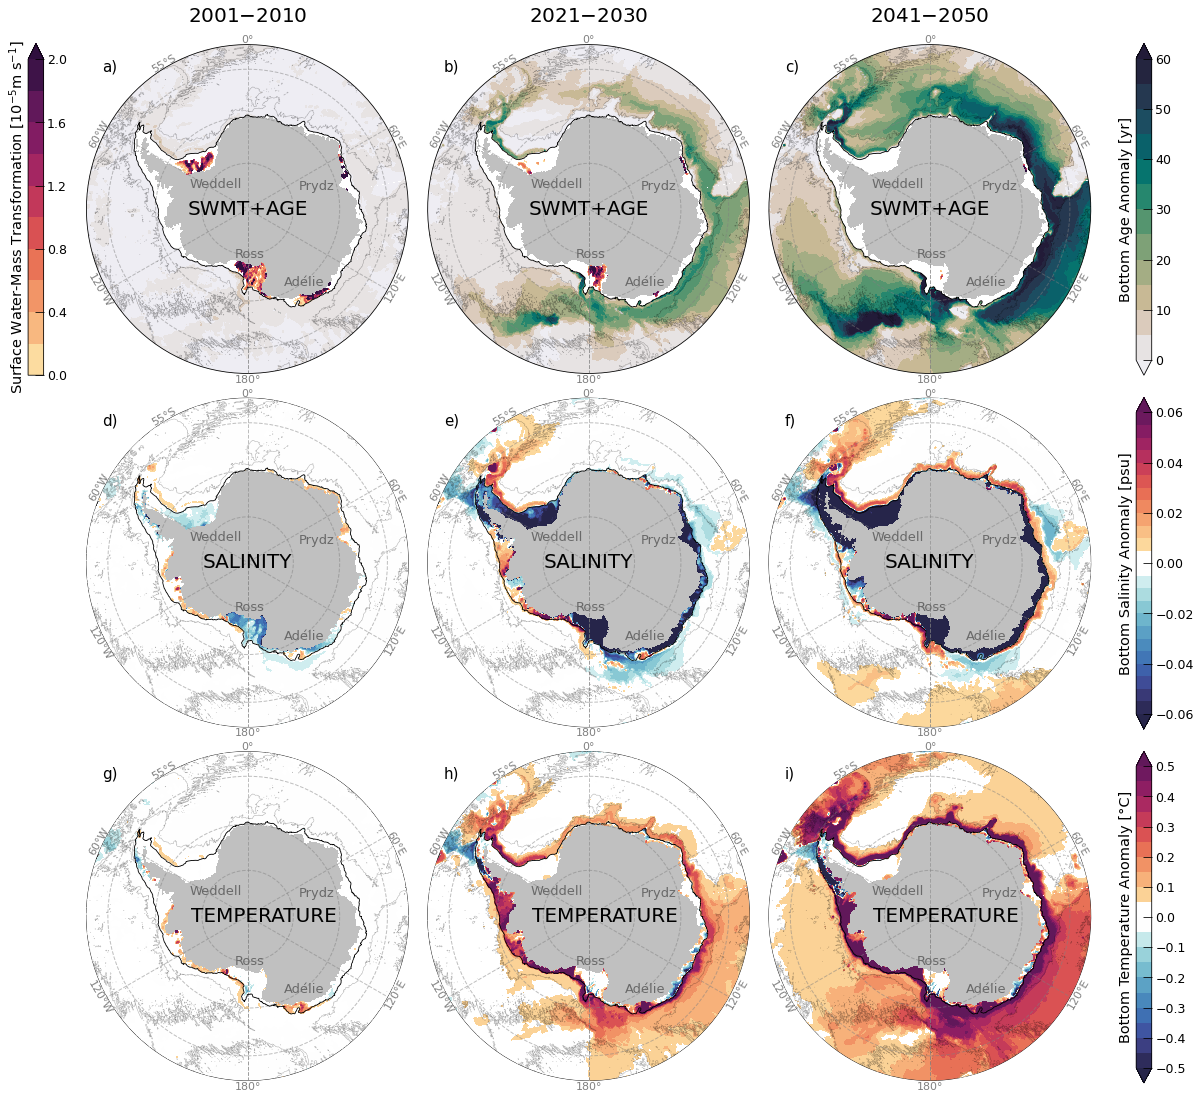

In [6]:
make_plot9_SouthPolarStereo(lon_shelf,lat_shelf,swmt_mean_shelf_wthmp,age_bl_anom_wthmp_off,salt_bl_anom_wthmp,temp_bl_anom_wthmp,\
                            levs_swmt,levs_age,levs_salt,levs_temp,\
                            unit_swmt,unit_age,unit_salt,unit_temp,\
                            colormap_swmt,colormap_age,colormap_salt,colormap_temp,PI)

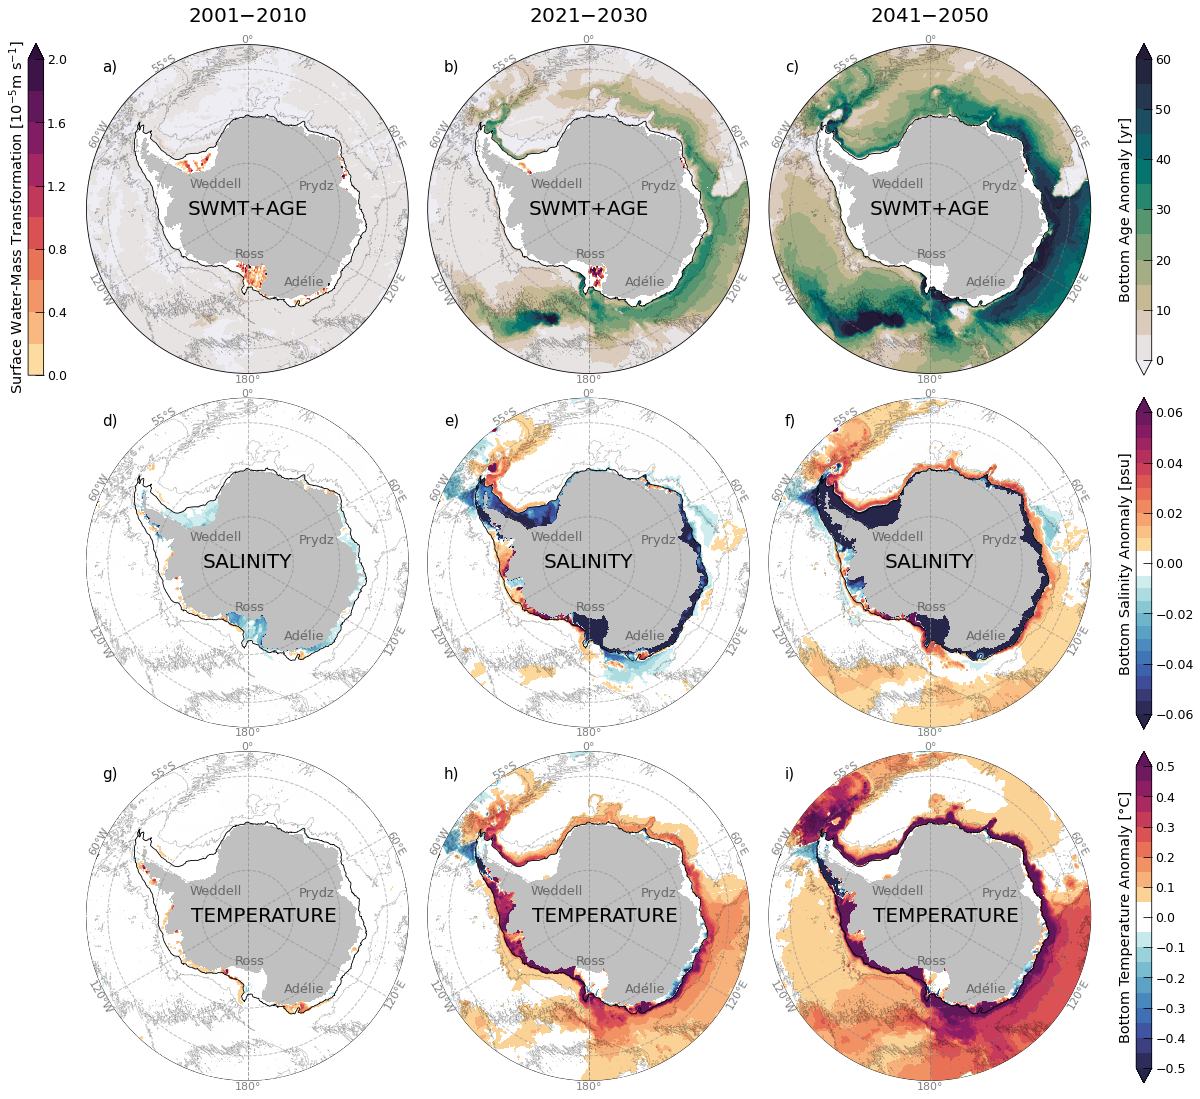

In [7]:
make_plot9_SouthPolarStereo(lon_shelf,lat_shelf,swmt_mean_shelf_mp,age_bl_anom_mp_off,salt_bl_anom_mp,temp_bl_anom_mp,\
                            levs_swmt,levs_age,levs_salt,levs_temp,\
                            unit_swmt,unit_age,unit_salt,unit_temp,\
                            colormap_swmt,colormap_age,colormap_salt,colormap_temp,PI)